### Подготовка

**Загрузка библиотек:**

https://drive.google.com/file/d/1-_LKbDsiq0dDbks7_JnBJVV7v2iWjSkd/view?usp=sharing

In [ ]:
!pip install phik

In [ ]:
import matplotlib.pyplot as plt           # Импорт модуля pyplot
import numpy as np                        # Импорт библиотеки numpy
import pandas as pd                       # для анализа табличных массивов данных
import gdown, os, random                  # Стандартные библиотеки
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!gdown --id '1-_LKbDsiq0dDbks7_JnBJVV7v2iWjSkd'
!rm -r sample_data

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-_LKbDsiq0dDbks7_JnBJVV7v2iWjSkd
To: /content/base_for_analiz.zip
100% 88.5M/88.5M [00:01<00:00, 57.7MB/s]


In [ ]:
!unzip -o /content/base_for_analiz.zip

In [ ]:
base = '/content/base_for_analiz/Ozon/База.csv'
remove_list = ["(при наличии)",                 # список кусков текста для удаления из названий столбцов
               "(кроме Твери)",
               "руб.",
               "(перечеркнутая цена)",
               ",",
               "%",
               "с учетом скидки",
               "на рыночную цену"]

In [ ]:
# Нормализуем заголовки столбцов
def clean_header(header):

    cleaned_header = header
    cleaned_header = cleaned_header.replace('-', "_")
    cleaned_header = cleaned_header.replace('" ', '"')
    cleaned_header = cleaned_header.replace(' "', '"')

    for item in remove_list:
        cleaned_header = cleaned_header.replace(item, "")

    cleaned_header = cleaned_header.replace('  ', '')
    cleaned_header = cleaned_header.replace('_"', '"')
    cleaned_header = cleaned_header.strip()  # удаление ведущих и концевых пробелов
    cleaned_header = cleaned_header.replace(" ", "_")  # замена оставшихся пробелов символом "_"
    cleaned_header = cleaned_header.replace('_"', '"')

    list_heads = cleaned_header.replace(';', ',')
    list_heads = list_heads.replace('"', '')
    list_heads = list_heads.replace('_"', '"')
    # print(header, " --->  ", list_heads)

    return cleaned_header

def clean_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        lines = file.readlines()
        cleaned_headers = clean_header(lines[0]);  # применяем функцию clean_header к каждому заголовку
        lines[0] = cleaned_headers + '\n'
        print(cleaned_headers)

    with open(file_path, 'w', newline='') as file:
        file.writelines(lines)

    return cleaned_headers

list_heads = clean_csv(base)


﻿"Артикул";"Ozon_Product_ID";"FBO_OZON_SKU_ID";"FBS_OZON_SKU_ID";"Barcode";"Наименование_товара";"Контент_рейтинг";"Бренд";"Статус_товара";"Видимость_FBO";"Причины_скрытия_FBO";"Видимость_FBS";"Причины_скрытия_FBS";"Дата_создания";"Коммерческая_категория";"Объем_товара_л";"Объемный_вес_кг";"Доступно_на_складе_Ozon_шт";"Вывезти_и_нанести_КИЗшт";"Зарезервировано_шт";"Доступно_на_моих_складах_шт";"Зарезервировано_на_моих_складах_шт";"Текущая_цена";"Цена_до_скидки";"Цена_Premium";"Рыночная_цена";"Актуальная_ссылка";"Размер_НДС"


In [ ]:
df = pd.read_csv('/content/base_for_analiz/Ozon/База.csv', sep=';')   #, encoding='cp1251' если выдаёт ошибку

In [ ]:
df.head(1)

,Артикул,Ozon_Product_ID,FBO_OZON_SKU_ID,FBS_OZON_SKU_ID,Barcode,Наименование_товара,Контент_рейтинг,Бренд,Статус_товара,Видимость_FBO,...,Вывезти_и_нанести_КИЗшт,Зарезервировано_шт,Доступно_на_моих_складах_шт,Зарезервировано_на_моих_складах_шт,Текущая_цена,Цена_до_скидки,Цена_Premium,Рыночная_цена,Актуальная_ссылка,Размер_НДС
0,'30273,105606938,298131117,298131122,2000000036618,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,GNX,Продается,Показывается,...,0,0,26,0,1200.0,1800.0,NaN,NaN,NaN,0%


In [ ]:
len(df)

1263

In [ ]:
df.columns

Index(['Артикул', 'Ozon_Product_ID', 'FBO_OZON_SKU_ID', 'FBS_OZON_SKU_ID',
       'Barcode', 'Наименование_товара', 'Контент_рейтинг', 'Бренд',
       'Статус_товара', 'Видимость_FBO', 'Причины_скрытия_FBO',
       'Видимость_FBS', 'Причины_скрытия_FBS', 'Дата_создания',
       'Коммерческая_категория', 'Объем_товара_л', 'Объемный_вес_кг',
       'Доступно_на_складе_Ozon_шт', 'Вывезти_и_нанести_КИЗшт',
       'Зарезервировано_шт', 'Доступно_на_моих_складах_шт',
       'Зарезервировано_на_моих_складах_шт', 'Текущая_цена', 'Цена_до_скидки',
       'Цена_Premium', 'Рыночная_цена', 'Актуальная_ссылка', 'Размер_НДС'],
      dtype='object')

# Анализ данных

## Подготовка Датафреймов для дальнейшего анализа

### нормализуем таблицу **Base**

In [ ]:
df.isna().mean().sort_values(ascending=False)  # Смотрим в каких столбца какой процент пропусков и можно ли их восполнить или удалить столбец, если он не информативен для обучения модели

Цена_Premium                          1.000000
Актуальная_ссылка                     0.988915
Рыночная_цена                         0.988915
Причины_скрытия_FBS                   0.984165
Причины_скрытия_FBO                   0.978622
Цена_до_скидки                        0.125891
Barcode                               0.045922
Текущая_цена                          0.004751
Бренд                                 0.003959
Артикул                               0.000000
Объемный_вес_кг                       0.000000
Зарезервировано_на_моих_складах_шт    0.000000
Доступно_на_моих_складах_шт           0.000000
Зарезервировано_шт                    0.000000
Вывезти_и_нанести_КИЗшт               0.000000
Доступно_на_складе_Ozon_шт            0.000000
Коммерческая_категория                0.000000
Объем_товара_л                        0.000000
Ozon_Product_ID                       0.000000
Дата_создания                         0.000000
Видимость_FBS                         0.000000
Видимость_FBO

In [ ]:
# Физически удаляем из файла (плохой вариант)
# df.drop(df[df['Видимость_FBO'] == 'Скрыт'].index, inplace=True)
# df.drop(df[df['Видимость_FBS'] == 'Скрыт'].index, inplace=True)
# df1 = df.drop(df[df['Видимость_FBS'] == 'Скрыт'].index)
# df1 = df1.drop(df1[df1['Видимость_FBO'] == 'Скрыт'].index).copy()
df1 = df[df['Видимость_FBO'] != 'Скрыт'].copy()

In [ ]:
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1262
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Артикул                             1221 non-null   object 
 1   Ozon_Product_ID                     1221 non-null   int64  
 2   FBO_OZON_SKU_ID                     1221 non-null   int64  
 3   FBS_OZON_SKU_ID                     1221 non-null   int64  
 4   Barcode                             1178 non-null   object 
 5   Наименование_товара                 1221 non-null   object 
 6   Контент_рейтинг                     1221 non-null   object 
 7   Бренд                               1221 non-null   object 
 8   Статус_товара                       1221 non-null   object 
 9   Видимость_FBO                       1221 non-null   object 
 10  Причины_скрытия_FBO                 0 non-null      object 
 11  Видимость_FBS                       1221 no

In [ ]:
df['Доступно_на_складах'] = df['Доступно_на_складе_Ozon_шт']+df['Доступно_на_моих_складах_шт']

In [ ]:
df.sort_values('Доступно_на_складах', ascending=False)

,Артикул,Ozon_Product_ID,FBO_OZON_SKU_ID,FBS_OZON_SKU_ID,Barcode,Наименование_товара,Контент_рейтинг,Бренд,Статус_товара,Видимость_FBO,...,Зарезервировано_шт,Доступно_на_моих_складах_шт,Зарезервировано_на_моих_складах_шт,Текущая_цена,Цена_до_скидки,Цена_Premium,Рыночная_цена,Актуальная_ссылка,Размер_НДС,Доступно_на_складах
3,'25775,175507357,409388811,409388809,2000000005034,Герметик для фар жесткий бутиловый черный (4 м...,'17.5,GNX,Продается,Показывается,...,0,873,0,1200.0,NaN,NaN,NaN,NaN,0%,873
1165,'34193,419232883,805197289,805197290,2000000049434,Светодиодные линзы GNX Silver 3.0 (комплект),'30,GNX,Продается,Показывается,...,0,582,0,12000.0,NaN,NaN,NaN,NaN,0%,582
1090,'25789,328236921,650525298,650525299,2000000005027,Герметик для фар твердый бутиловый серый (4 ме...,'0,GNX,Продается,Показывается,...,0,555,0,1200.0,NaN,NaN,NaN,NaN,0%,555
326,'31319,239013775,510826420,510826421,2000000044330,Светодиодные линзы Eneg A3 MAX (комплект),'30,Aozoom,Продается,Показывается,...,0,505,0,7500.0,16500.0,NaN,8000.0,https://wildberries.ru/catalog/93214389/detail...,0%,505
1,'30383,105742204,298264198,298264234,2000000037899,Биксеноновая линза GNX Hella 3R Crystal Vision...,'37.5,GNX,Продается,Показывается,...,0,410,0,1990.0,3500.0,NaN,NaN,NaN,0%,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,'29912,239631888,511572384,511572387,2000000031897,"Стекло фары Mercedes G W463 2006-2018, левое, ...",'15,GNX,Готов к продаже,Показывается,...,0,0,0,4950.0,8550.0,NaN,NaN,NaN,0%,0
655,'29922,239631889,511574742,511574744,2000000032016,"Стекло фары Mitsubishi Pajero Sport 1998-2008,...",'15,GNX,Готов к продаже,Показывается,...,0,0,0,3740.0,6460.0,NaN,NaN,NaN,0%,0
657,'29905,239631891,511573028,511573029,2000000031965,"Стекло фары Toyota RAV 4 (2018 - 2020 г.в.), п...",'15,GNX,Готов к продаже,Показывается,...,0,0,0,7276.0,12920.0,NaN,NaN,NaN,0%,0
658,'29943,239631892,511572892,511572893,2000000032627,"Стекло фары Audi A6 C8 2018-2021, левое, GNX, ...",'15,GNX,Готов к продаже,Показывается,...,0,0,0,3300.0,5700.0,NaN,NaN,NaN,0%,0


In [ ]:
df['Доступно_на_складах'].sum()

24407

In [ ]:
df.isna().mean().sort_values(ascending=False)

Цена_Premium                          1.000000
Причины_скрытия_FBO                   1.000000
Причины_скрытия_FBS                   1.000000
Актуальная_ссылка                     0.989353
Рыночная_цена                         0.989353
Цена_до_скидки                        0.117117
Barcode                               0.035217
Артикул                               0.000000
Объемный_вес_кг                       0.000000
Размер_НДС                            0.000000
Текущая_цена                          0.000000
Зарезервировано_на_моих_складах_шт    0.000000
Доступно_на_моих_складах_шт           0.000000
Зарезервировано_шт                    0.000000
Вывезти_и_нанести_КИЗшт               0.000000
Доступно_на_складе_Ozon_шт            0.000000
Коммерческая_категория                0.000000
Объем_товара_л                        0.000000
Ozon_Product_ID                       0.000000
Дата_создания                         0.000000
Видимость_FBS                         0.000000
Видимость_FBO

**Удаляем колонки:**

Barcode - 0.045922 - неинформативен

Видимость_FBO -- неинформативен

Причины_скрытия_FBO - 0.978622 - неинформативен

Видимость_FBS -- неинформативен

Причины_скрытия_FBS -- неинформативен

Дата_создания -- неинформативен

Объем_товара_л -- неинформативен

Объемный_вес_кг -- неинформативен

Вывезти_и_нанести_КИЗшт -- неинформативен

Цена_Premium - 1.000000- пустой

Рыночная_цена -- 0.988915 - Пустой

Актуальная_ссылка -- 0.988915 -- неинформативен

Размер_НДС_% -- неинформативен

In [ ]:
df = df[['Артикул', 'Ozon_Product_ID', 'FBO_OZON_SKU_ID', 'FBS_OZON_SKU_ID',
       'Наименование_товара', 'Контент_рейтинг', 'Бренд',
       'Коммерческая_категория','Текущая_цена', 'Цена_до_скидки', 'Доступно_на_складах']]
df.head(1)


,Артикул,Ozon_Product_ID,FBO_OZON_SKU_ID,FBS_OZON_SKU_ID,Наименование_товара,Контент_рейтинг,Бренд,Коммерческая_категория,Текущая_цена,Цена_до_скидки,Доступно_на_складах
0,'30273,105606938,298131117,298131122,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,GNX,Фонарь задний для авто,1200.0,1800.0,26


In [ ]:
df.isna().mean().sort_values(ascending=False)

Цена_до_скидки            0.117117
Артикул                   0.000000
Ozon_Product_ID           0.000000
FBO_OZON_SKU_ID           0.000000
FBS_OZON_SKU_ID           0.000000
Наименование_товара       0.000000
Контент_рейтинг           0.000000
Бренд                     0.000000
Коммерческая_категория    0.000000
Текущая_цена              0.000000
Доступно_на_складах       0.000000
dtype: float64

In [ ]:
# Заполнение пустых значений в колонке 'Цена_до_скидки' значениями из колонки 'Текущая_цена'
df['Цена_до_скидки'].fillna(df['Текущая_цена'], inplace=True)
#df1 = df['Цена_до_скидки'].fillna(df['Текущая_цена']).copy()

In [ ]:
# Преобразуем столбцы в тип данных 'float64'
# columns_to_convert = ['Контент_рейтинг', 'Столбец2', 'Столбец3']
# df[columns_to_convert] = df[columns_to_convert].astype(float)
df['Контент_рейтинг'] = df['Контент_рейтинг'].replace('Рассчитываем',"'0.0", regex=True)
df['Контент_рейтинг'] = df['Контент_рейтинг'].replace("'","", regex=True).astype(float)

In [ ]:
df.describe()

,Ozon_Product_ID,FBO_OZON_SKU_ID,FBS_OZON_SKU_ID,Контент_рейтинг,Текущая_цена,Цена_до_скидки,Доступно_на_складах
count,1.221000e+03,1.221000e+03,1.221000e+03,1221.000000,1221.000000,1221.000000,1221.000000
mean,2.665260e+08,5.659539e+08,5.659539e+08,10.425880,4416.705160,7143.097461,19.989353
std,6.282560e+07,1.121405e+08,1.121405e+08,9.677316,3864.440634,6048.612305,50.847481
min,7.262091e+07,2.609120e+08,2.609120e+08,0.000000,198.000000,198.000000,0.000000
25%,2.390137e+08,5.106758e+08,5.106758e+08,0.000000,1639.000000,2831.000000,0.000000
50%,2.396318e+08,5.115767e+08,5.115767e+08,15.000000,3707.000000,6000.000000,3.000000
75%,2.785884e+08,5.797315e+08,5.797315e+08,15.000000,5500.000000,9100.000000,22.000000
max,5.088050e+08,9.660743e+08,9.660743e+08,52.500000,40100.000000,55000.000000,873.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1262
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Артикул                 1221 non-null   object 
 1   Ozon_Product_ID         1221 non-null   int64  
 2   FBO_OZON_SKU_ID         1221 non-null   int64  
 3   FBS_OZON_SKU_ID         1221 non-null   int64  
 4   Наименование_товара     1221 non-null   object 
 5   Контент_рейтинг         1221 non-null   float64
 6   Бренд                   1221 non-null   object 
 7   Коммерческая_категория  1221 non-null   object 
 8   Текущая_цена            1221 non-null   float64
 9   Цена_до_скидки          1221 non-null   float64
 10  Доступно_на_складах     1221 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 114.5+ KB


In [ ]:
cols = ['FBS_OZON_SKU_ID', 'FBO_OZON_SKU_ID', 'Артикул', 'Ozon_Product_ID']
for col in cols:
  nonuniq = df[df.duplicated(subset=col)][col]
  print(f'Не уникальных значений В колонке {col} - {nonuniq.count()}')

Не уникальных значений В колонке FBS_OZON_SKU_ID - 0
Не уникальных значений В колонке FBO_OZON_SKU_ID - 0
Не уникальных значений В колонке Артикул - 0
Не уникальных значений В колонке Ozon_Product_ID - 0


In [ ]:
# Выгружаем готовый ДФ  в отдельный файл
df.to_csv('base-done.csv', index=False)
df_base = df.copy()

In [ ]:
!ls

action-done.csv  base_for_analiz      grafik-done.csv
base-done.csv	 base_for_analiz.zip


### нормализуем таблицу **/content/base_for_analiz/Ozon/Аналитика Графики 01.06.2022-31.05.2023.xlsx**

In [ ]:
xls = '/content/base_for_analiz/Ozon/Аналитика Графики 01.06.2022-31.05.2023.xlsx'

In [ ]:
df = pd.read_excel(xls)   #, encoding='cp1251' если выдаёт ошибку

In [ ]:
import re

def clean_column_names(df):
    cleaned_columns = []

    for column in df.columns:
        cleaned_column = re.sub(r"[^\w\s]", "", column)  # Оставляем только буквы, цифры и пробелы
        cleaned_column = cleaned_column.replace(" ", "_")  # Заменяем пробелы на "_"
        cleaned_columns.append(cleaned_column)

    df.columns = cleaned_columns
    return df


In [ ]:
df = clean_column_names(df)
df.columns

Index(['Категория_3го_уровня', 'Товары', 'Модель', 'Ozon_ID', 'Артикул',
       'День', 'Уникальные_посетители_всего',
       'Уникальные_посетители_с_просмотром_карточки_товара', 'Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'В_корзину_всего', 'Заказано_товаров',
       'Отменено_товаров', 'Доставлено_за_выбранный_период',
       'Возвращено_товаров', 'Заказано_на_сумму',
       'Отправления_с_премиумподпиской_принятые_в_обработку'],
      dtype='object')

In [ ]:
# Убираем колонгку 'Отправления_с_премиумподпиской_принятые_в_обработку'
df = df[['Категория_3го_уровня', 'Товары', 'Модель', 'Ozon_ID', 'Артикул',
       'День', 'Уникальные_посетители_всего',
       'Уникальные_посетители_с_просмотром_карточки_товара', 'Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'В_корзину_всего', 'Заказано_товаров',
       'Отменено_товаров', 'Доставлено_за_выбранный_период',
       'Возвращено_товаров', 'Заказано_на_сумму']]

In [ ]:
df['День'] = pd.to_datetime(df['День'], format='%Y.%m.%d')

# Преобразуем столбец 'date' в нужный формат 'dd.mm.yyyy'
# df['День'] = df['День'].dt.strftime('%d.%m.%Y')

# df['День'] = pd.to_datetime(df['День'], format='%d.%m.%Y')
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].replace(',','.', regex=True)
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].astype(float)
df['Ozon_ID'] = df['Ozon_ID'].astype(str)

In [ ]:
df.dtypes


Категория_3го_уровня                                          object
Товары                                                        object
Модель                                                        object
Ozon_ID                                                       object
Артикул                                                       object
День                                                  datetime64[ns]
Уникальные_посетители_всего                                    int64
Уникальные_посетители_с_просмотром_карточки_товара             int64
Показы_всего                                                   int64
Показы_на_карточке_товара                                      int64
Показы_в_поиске_и_каталоге                                     int64
Позиция_в_поиске_и_каталоге                                  float64
В_корзину_всего                                                int64
Заказано_товаров                                               int64
Отменено_товаров                  

In [ ]:
df.head()

,Категория_3го_уровня,Товары,Модель,Ozon_ID,Артикул,День,Уникальные_посетители_всего,Уникальные_посетители_с_просмотром_карточки_товара,Показы_всего,Показы_на_карточке_товара,Показы_в_поиске_и_каталоге,Позиция_в_поиске_и_каталоге,В_корзину_всего,Заказано_товаров,Отменено_товаров,Доставлено_за_выбранный_период,Возвращено_товаров,Заказано_на_сумму
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353426,34414,2023-03-03,1,1,6,1,4,1.00,0,0,0,0,0,0
1,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353426,34414,2023-03-05,1,0,2,0,2,1.00,0,0,0,0,0,0
2,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-05,65,3,69,3,40,110.33,0,0,0,0,0,0
3,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-06,85,3,109,3,46,103.43,0,0,0,0,0,0
4,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-07,44,2,50,2,37,97.14,0,0,0,0,0,0


In [ ]:
df.isna().mean().sort_values(ascending=False)

Модель                                                0.170117
Категория_3го_уровня                                  0.000000
Показы_в_поиске_и_каталоге                            0.000000
Возвращено_товаров                                    0.000000
Доставлено_за_выбранный_период                        0.000000
Отменено_товаров                                      0.000000
Заказано_товаров                                      0.000000
В_корзину_всего                                       0.000000
Позиция_в_поиске_и_каталоге                           0.000000
Показы_на_карточке_товара                             0.000000
Товары                                                0.000000
Показы_всего                                          0.000000
Уникальные_посетители_с_просмотром_карточки_товара    0.000000
Уникальные_посетители_всего                           0.000000
День                                                  0.000000
Артикул                                               0

In [ ]:
# Выгружаем готовый ДФ  в отдельный файл
df.to_csv('grafik-done.csv', index=False)
df_graf = df.copy()

### Подготовка Датафрейма "/content/base_for_analiz/Ozon/Аналитика Акции 01.06.2022-31.05.2023.xlsx"

In [ ]:
xls = '/content/base_for_analiz/Ozon/Аналитика Акции 01.06.2022-31.05.2023.xlsx'
df = pd.read_excel(xls)   #, encoding='cp1251' если выдаёт ошибку

In [ ]:
df.isna().mean().sort_values(ascending=False)

Акции                                                    0.851619
Модель                                                   0.163113
Категория 3-го уровня                                    0.000000
Показы в поиске и каталоге                               0.000000
Заказано на сумму по акции                               0.000000
Заказано товаров по акции                                0.000000
Заказано на сумму                                        0.000000
Доставлено (за выбранный период)                         0.000000
Заказано товаров                                         0.000000
В корзину, всего                                         0.000000
Позиция в поиске и каталоге                              0.000000
Показы на карточке товара                                0.000000
Товары                                                   0.000000
Показы, всего                                            0.000000
Уникальные посетители с просмотром карточки товара       0.000000
Уникальные

In [ ]:
import re

def clean_column_names(df):
    cleaned_columns = []

    for column in df.columns:
        cleaned_column = re.sub(r"[^\w\s]", "", column)  # Оставляем только буквы, цифры и пробелы
        cleaned_column = cleaned_column.replace(" ", "_")  # Заменяем пробелы на "_"
        cleaned_columns.append(cleaned_column)

    df.columns = cleaned_columns
    return df


In [ ]:
df = clean_column_names(df)
df.columns

Index(['Категория_3го_уровня', 'Товары', 'Модель', 'Ozon_ID', 'Артикул',
       'Акции', 'День', 'Уникальные_посетители_всего',
       'Уникальные_посетители_с_просмотром_карточки_товара', 'Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'В_корзину_всего', 'Заказано_товаров',
       'Доставлено_за_выбранный_период', 'Заказано_на_сумму',
       'Заказано_товаров_по_акции', 'Заказано_на_сумму_по_акции',
       'Отправления_с_премиумподпиской_принятые_в_обработку'],
      dtype='object')

In [ ]:
# Убираем колонгку 'Отправления_с_премиумподпиской_принятые_в_обработку'
df = df[['Категория_3го_уровня', 'Товары', 'Модель', 'Ozon_ID', 'Артикул',
       'Акции', 'День', 'Уникальные_посетители_всего',
       'Уникальные_посетители_с_просмотром_карточки_товара', 'Показы_всего',
       'Показы_на_карточке_товара', 'Показы_в_поиске_и_каталоге',
       'Позиция_в_поиске_и_каталоге', 'В_корзину_всего', 'Заказано_товаров',
       'Доставлено_за_выбранный_период', 'Заказано_на_сумму',
       'Заказано_товаров_по_акции', 'Заказано_на_сумму_по_акции']]

In [ ]:
df['День'] = pd.to_datetime(df['День'], format='%Y.%m.%d')

<ipython-input-104-d4cafb6f4b84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['День'] = pd.to_datetime(df['День'], format='%Y.%m.%d')


In [ ]:
df['Ozon_ID'] = df['Ozon_ID'].astype(str)
df['Артикул'] = df['Артикул'].astype(str)
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].replace(',','.', regex=True)
df['Позиция_в_поиске_и_каталоге'] = df['Позиция_в_поиске_и_каталоге'].astype(float)

In [ ]:
df.dtypes

Категория_3го_уровня                                          object
Товары                                                        object
Модель                                                        object
Ozon_ID                                                       object
Артикул                                                       object
Акции                                                         object
День                                                  datetime64[ns]
Уникальные_посетители_всего                                    int64
Уникальные_посетители_с_просмотром_карточки_товара             int64
Показы_всего                                                   int64
Показы_на_карточке_товара                                      int64
Показы_в_поиске_и_каталоге                                     int64
Позиция_в_поиске_и_каталоге                                  float64
В_корзину_всего                                                int64
Заказано_товаров                  

In [ ]:
# Выгружаем готовый ДФ  в отдельный файл
df.to_csv('action-done.csv', index=False)
df_act = df.copy()

## Срединяем таблицы

In [ ]:
# df_base = pd.read_csv('/content/base-done.csv', sep=';')
# df_graf = pd.read_csv('/content/grafik-done.csv', sep=';')
# df_act = pd.read_csv('/content/action-done.csv', sep=';')

In [ ]:
df_base.head(1)

,Артикул,Ozon_Product_ID,FBO_OZON_SKU_ID,FBS_OZON_SKU_ID,Наименование_товара,Контент_рейтинг,Бренд,Коммерческая_категория,Текущая_цена,Цена_до_скидки,Доступно_на_складах
0,'30273,105606938,298131117,298131122,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,15.0,GNX,Фонарь задний для авто,1200.0,1800.0,26


In [ ]:
df_graf.head(1)

,Категория_3го_уровня,Товары,Модель,Ozon_ID,Артикул,День,Уникальные_посетители_всего,Уникальные_посетители_с_просмотром_карточки_товара,Показы_всего,Показы_на_карточке_товара,Показы_в_поиске_и_каталоге,Позиция_в_поиске_и_каталоге,В_корзину_всего,Заказано_товаров,Отменено_товаров,Доставлено_за_выбранный_период,Возвращено_товаров,Заказано_на_сумму
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353426,34414,2023-03-03,1,1,6,1,4,1.0,0,0,0,0,0,0


In [ ]:
df_act.head(1)

,Категория_3го_уровня,Товары,Модель,Ozon_ID,Артикул,Акции,День,Уникальные_посетители_всего,Уникальные_посетители_с_просмотром_карточки_товара,Показы_всего,Показы_на_карточке_товара,Показы_в_поиске_и_каталоге,Позиция_в_поиске_и_каталоге,В_корзину_всего,Заказано_товаров,Доставлено_за_выбранный_период,Заказано_на_сумму,Заказано_товаров_по_акции,Заказано_на_сумму_по_акции
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-05,65,3,69,3,40,110.33,0,0,0,0,0,0


In [ ]:
# Объединение таблиц
merged_df = pd.merge(df_graf, df_act, on=['Артикул', 'День'], how='inner')


In [ ]:
df = merged_df.copy()

In [ ]:
df.head(3)

,Категория_3го_уровня_x,Товары_x,Модель_x,Ozon_ID_x,Артикул,День,Уникальные_посетители_всего_x,Уникальные_посетители_с_просмотром_карточки_товара_x,Показы_всего_x,Показы_на_карточке_товара_x,...,Показы_всего_y,Показы_на_карточке_товара_y,Показы_в_поиске_и_каталоге_y,Позиция_в_поиске_и_каталоге_y,В_корзину_всего_y,Заказано_товаров_y,Доставлено_за_выбранный_период_y,Заказано_на_сумму_y,Заказано_товаров_по_акции,Заказано_на_сумму_по_акции
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353426,34414,2023-03-05,1,0,2,0,...,69,3,40,110.33,0,0,0,0,0,0
1,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-05,65,3,69,3,...,69,3,40,110.33,0,0,0,0,0,0
2,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,2023-03-06,85,3,109,3,...,109,3,46,103.43,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Категория_3го_уровня_x', 'Товары_x', 'Модель_x', 'Ozon_ID_x',
       'Артикул', 'День', 'Уникальные_посетители_всего_x',
       'Уникальные_посетители_с_просмотром_карточки_товара_x',
       'Показы_всего_x', 'Показы_на_карточке_товара_x',
       'Показы_в_поиске_и_каталоге_x', 'Позиция_в_поиске_и_каталоге_x',
       'В_корзину_всего_x', 'Заказано_товаров_x', 'Отменено_товаров',
       'Доставлено_за_выбранный_период_x', 'Возвращено_товаров',
       'Заказано_на_сумму_x', 'Категория_3го_уровня_y', 'Товары_y', 'Модель_y',
       'Ozon_ID_y', 'Акции', 'Уникальные_посетители_всего_y',
       'Уникальные_посетители_с_просмотром_карточки_товара_y',
       'Показы_всего_y', 'Показы_на_карточке_товара_y',
       'Показы_в_поиске_и_каталоге_y', 'Позиция_в_поиске_и_каталоге_y',
       'В_корзину_всего_y', 'Заказано_товаров_y',
       'Доставлено_за_выбранный_период_y', 'Заказано_на_сумму_y',
       'Заказано_товаров_по_акции', 'Заказано_на_сумму_по_акции'],
      dtype='object')

In [ ]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['Уникальные_посетители_всего_x', 'Уникальные_посетители_с_просмотром_карточки_товара_x', 'Показы_всего_x', 'Показы_на_карточке_товара_x', 'Показы_в_поиске_и_каталоге_x', 'Позиция_в_поиске_и_каталоге_x', 'В_корзину_всего_x', 'Заказано_товаров_x', 'Отменено_товаров', 'Доставлено_за_выбранный_период_x', 'Возвращено_товаров', 'Заказано_на_сумму_x', 'Уникальные_посетители_всего_y', 'Уникальные_посетители_с_просмотром_карточки_товара_y', 'Показы_всего_y', 'Показы_на_карточке_товара_y', 'Показы_в_поиске_и_каталоге_y', 'Позиция_в_поиске_и_каталоге_y', 'В_корзину_всего_y', 'Заказано_товаров_y', 'Доставлено_за_выбранный_период_y', 'Заказано_на_сумму_y', 'Заказано_товаров_по_акции', 'Заказано_на_сумму_по_акции']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Ozon_ID_x is large: 1048. Are you sure this is not an interval variable? Analysis for pairs of variables including Ozon_ID_x can be slow.
  warnings.warn(


<Axes: >

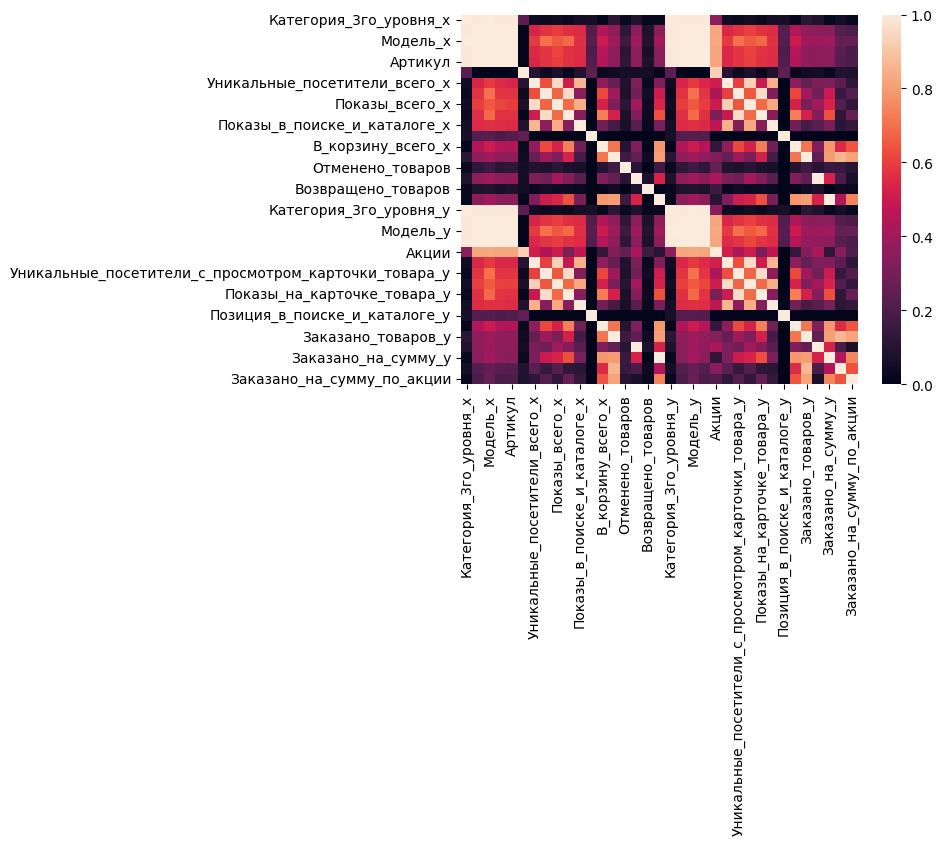

In [ ]:
sns.heatmap(phik_overview)